## Домашнее задание №2_1

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from sklearn import ensemble, preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

## Задания

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 
9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. Запустить другие классификаторы и выбрать параметры. Выбрать релевантные! Сравнить результаты
11. как-то побороться с несбалансированностью классов (если она есть)
12. исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

### 0. Описание задачи

Набор данных представляет из себя оценки уровня ожирения у людей из стран Мексики, Перу и Колумбии в возрасте от 14 до 61 года, с различными пищевыми привычками и физическим состоянием. На основе имеющихся данных необходимо определить, какие факторы оказывают наибольшее влияние на риск развития ожирения, исключив такой фактор, как генетическая предрасположенность.

### 1. Чтение данных

In [202]:
data = pd.read_csv('ObesityDataSet.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Здесь столбцы отвечают за следующие признаки:

**Gender**: Гендер

**Age**: Возраст

**Height**: Возраст

**Weight**: Вес

**family_history_with_overweight**: Наличие близких родственников с ожирением

**FAVC**: Частое употребление высококалорийной пищи

**FCVC**: Частота потребления овощей

**NCP**: Число основных приемов пищи

**CAEC**: Наличие перекусов между основными приемами пищи

**SMOKE**: Является курильщиком

**CH20**: Потребляемое число литров жидкости в день

**SCC**: Контроль над числом потребляемых калорий

**FAF**: Частота физических нагрузок

**TUE**: Время пользования гаджетами

**CALC**: Частота употребления алкоголя

**MTRANS**: Способ передвижения

**NObeyesdad**: Интерпретация индекса массы тела


### 2. Визуализация данных. Вычисление основных характеристик. Интерпретация

Выведем все описательные характеристики:

In [203]:
data.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


Теперь посмотрим только доступные данные:

In [204]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Видим, что имеется большое количество столбцов, значения которых могли бы быть представлены в числовом виде. С помощью средств Excel выполним кодировку категориальных признаков числовыми значениями. Для перечисленных колонок будем иметь следующие наборы:

**Gender**: Female - 0, Male - 1

**family_history_with_overweight, FAVC, SMOKE**: no - 0, yes - 1

**CAEC, CALC**: no - 0, Sometimes - 1, Frequently - 2, Always - 3

**MTRANS**: Bike - 0, Walking - 1, Public_Transportation - 2, Motorbike - 3, Automobile - 4

**NObeyesdad**: Insufficient_Weight - 0, Normal_Weight - 1, Overweight_Level_I - 2, Overweight_Level_2 - 3, Obesity_Type_I - 4, Obesity_Type_II - 5, Obesity_Type_III - 6

Прочитаем обновленный датасет:

In [205]:
data = pd.read_csv('ObesityDataSet_New.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,2,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,2,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,2,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,2,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,2,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,2,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,2,6


In [206]:
data.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,2.405021,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.864439,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,2.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,2.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


In [207]:
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,2.405021,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.864439,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,2.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,2.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,2.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


Признак **Интерпретация индекса массы тела** высчитывается из двух других - **Рост** и **Вес**. Исключим последние два из этих признаков:

In [208]:
del data['Weight']
del data['Height']
data

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,2,1
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,2,1
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,2,1
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,1,2
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,2,6
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,2,6
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,2,6
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,2,6


Для исследования корреляции между привычками и риском развития ожирения выберем только тех людей, у которых имеются близкие родственники с ожирением, а затем исключим этот признак:

In [209]:
data = data[data['family_history_with_overweight'] != 0]
del data['family_history_with_overweight']

data

,Gender,Age,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,2,1
1,0,21.000000,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,2,1
2,1,23.000000,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,2,1
6,0,23.000000,1,3.0,3.0,1,0,2.000000,0,1.000000,0.000000,1,3,1
8,1,24.000000,1,3.0,3.0,1,0,2.000000,0,1.000000,1.000000,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,2,6
2107,0,21.982942,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,2,6
2108,0,22.524036,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,2,6
2109,0,24.361936,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,2,6


Построим гистограммы для числовых признаков:

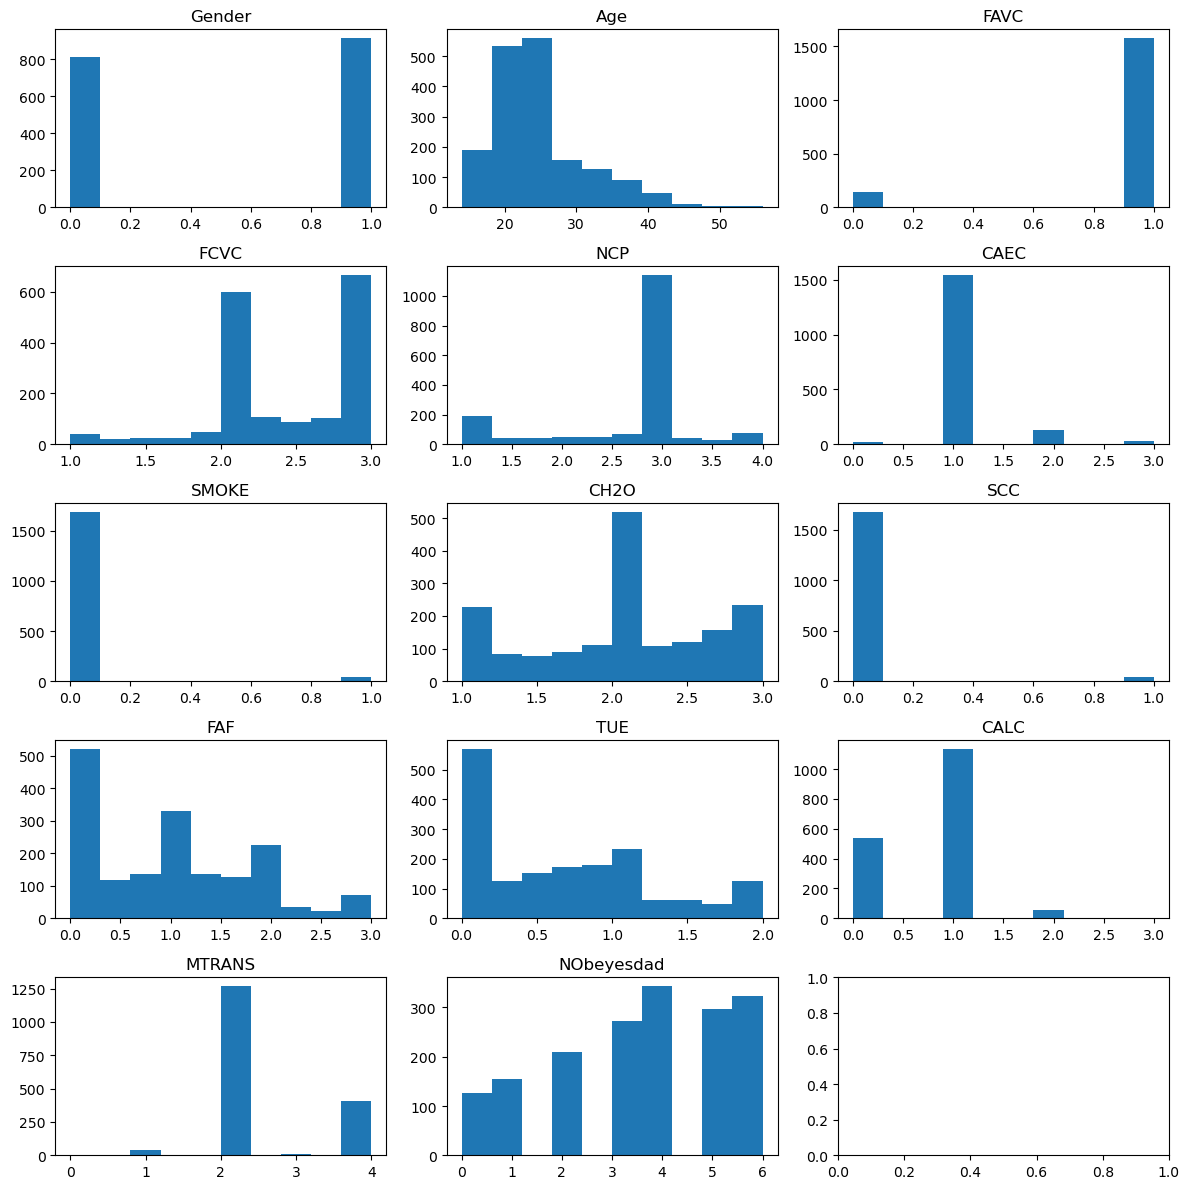

In [210]:
numeric_colums = data.select_dtypes(include=['float', 'int']).columns.tolist()
data_hist = data[numeric_colums]
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))
axes = axes.ravel()
for i in range(len(data_hist.columns)):
    axes[i].hist(data_hist.iloc[:, i], bins=10)
    axes[i].set_title(data_hist.columns[i])
plt.tight_layout()
plt.show()

Построим матрицу корреляции:

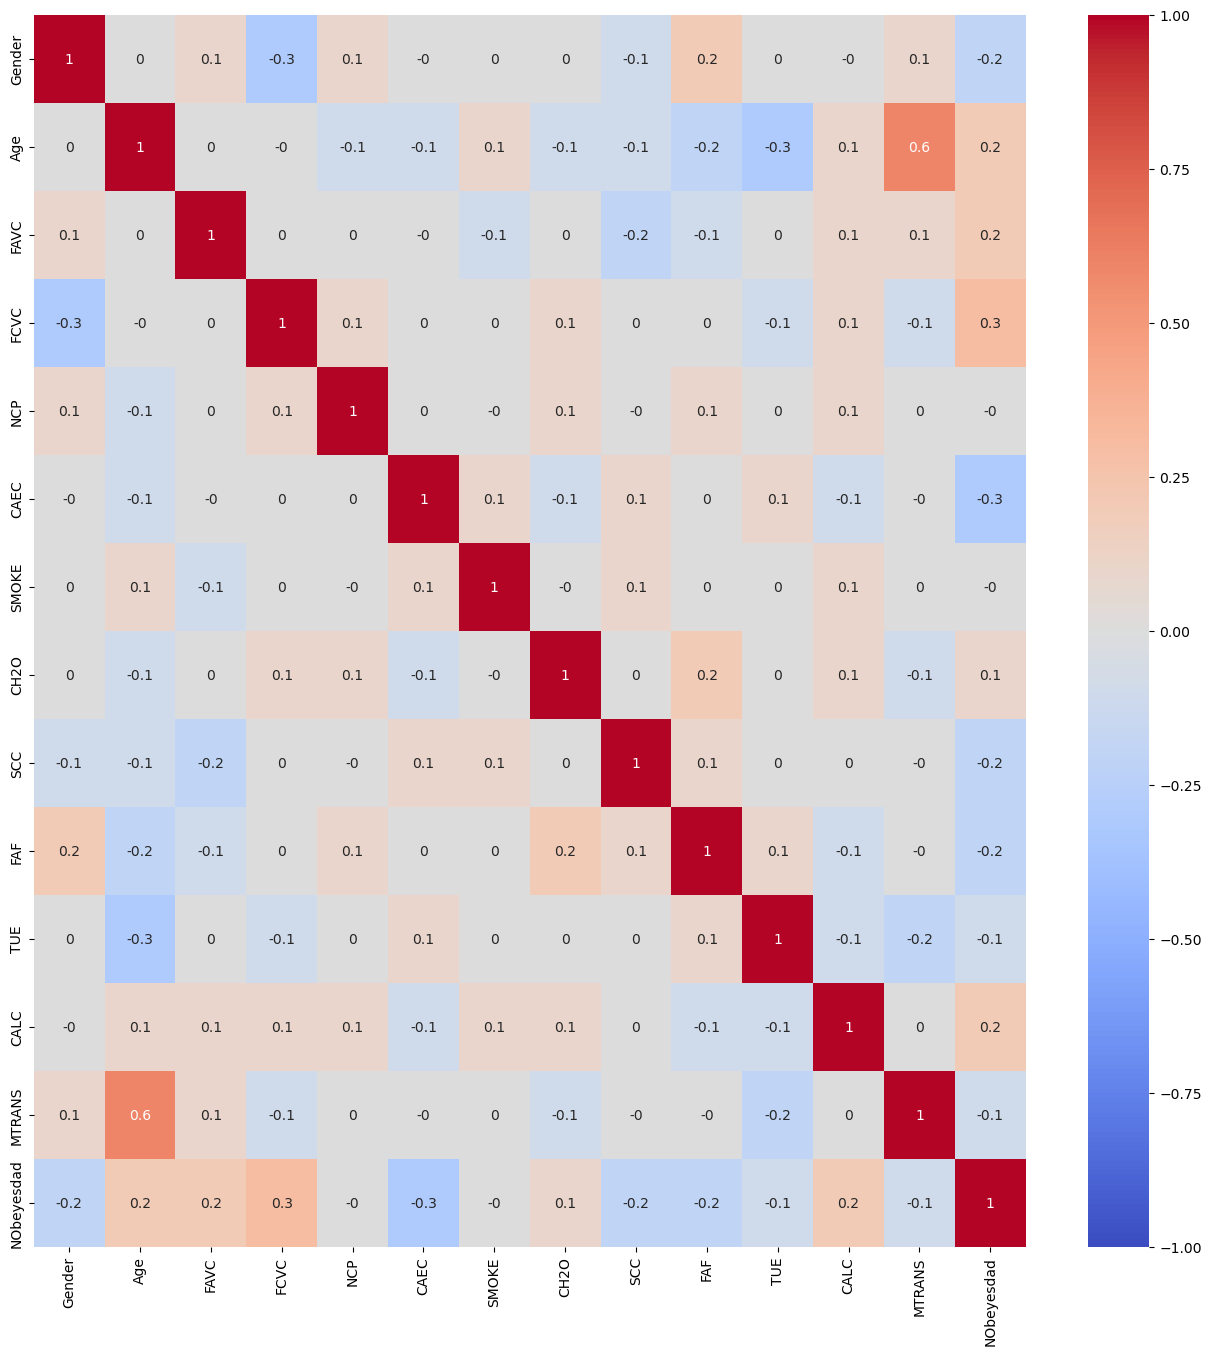

In [211]:
plt.figure(figsize=(16, 16))
sea.heatmap(round(data_hist.corr(), 1), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

По полученной матрицы можем видеть, что с ожирением коррелируют такие признаки, как **Частота употребления овощей**, **Частота употребления алкоголя**, **Частое употребление высококалорийной пищи** и **Возраст**.

Отрицательной корреляцией обладают признаки **Наличие перекусов между основными приемами пищи**, **Контроль над числом потребляемых калорий**, **Частота физических нагрузок**.

Наличие положительной корреляции по признаку **Частота употребления овощей** и отрицательной по признаку **Частота физических нагрузок** можно объяснить тем, что часть людей с лишним весом стремятся к похудению.

### 3. Обработка пропущенных значений

Выполним проверку наличия пропущенных значений:

In [162]:
nan_columns = data.isna().any()
nan_columns

Gender        False
Age           False
FAVC          False
FCVC          False
NCP           False
CAEC          False
SMOKE         False
CH2O          False
SCC           False
FAF           False
TUE           False
CALC          False
MTRANS        False
NObeyesdad    False
dtype: bool

Видим, что ни в одном из столбцов нет пропущенных значений. Однако, если бы они были, в зависимости от столбца можно было бы либо выполнить замену пропущенных значений, либо удалить сам столбец.

### 4. Обработка категориальных признаков

Категориальные признаки были обработаны ранее в п.2. с помощью средств Excel, а именно - были закодированы числами, для дальнейшего построения и анализа матрицы корреляции.

### 5. Нормализация признаков

Поскольку у нас имеются числовые данные в разных единицах измерения (литры, метры, килограммы), то для приведения их к единообразию следует провести нормализацию. Нормализация способна повысить скорость обучения алгоритмов и их точность.

In [163]:
features_to_normalize = data.drop(columns=['NObeyesdad'])
feature_to_exclude = data['NObeyesdad']

scaler = preprocessing.MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)

normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize.columns)

scaled_data = pd.concat([normalized_df, feature_to_exclude.reset_index(drop=True)], axis=1)

scaled_data

,Gender,Age,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.166667,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.000000,0.500000,0.000000,0.50,1
1,0.0,0.166667,0.0,1.0,0.666667,0.333333,1.0,1.000000,1.0,1.000000,0.000000,0.333333,0.50,1
2,1.0,0.214286,0.0,0.5,0.666667,0.333333,0.0,0.500000,0.0,0.666667,0.500000,0.666667,0.50,1
3,0.0,0.214286,1.0,1.0,0.666667,0.333333,0.0,0.500000,0.0,0.333333,0.000000,0.333333,0.75,1
4,1.0,0.238095,1.0,1.0,0.666667,0.333333,0.0,0.500000,0.0,0.333333,0.500000,0.666667,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.0,0.166115,1.0,1.0,0.666667,0.333333,0.0,0.364070,0.0,0.558756,0.453124,0.333333,0.50,6
1722,0.0,0.190070,1.0,1.0,0.666667,0.333333,0.0,0.502565,0.0,0.447130,0.299635,0.333333,0.50,6
1723,0.0,0.202953,1.0,1.0,0.666667,0.333333,0.0,0.527097,0.0,0.471403,0.323144,0.333333,0.50,6
1724,0.0,0.246713,1.0,1.0,0.666667,0.333333,0.0,0.926170,0.0,0.379702,0.293017,0.333333,0.50,6


### 6. Разбиение на обучающую и тестовую выборки

Для предсказания значения **Интерпретации индекса массы тела** будем использовать все имеющиеся у нас признаки:

In [164]:
X = scaled_data.drop('NObeyesdad', axis=1)
y = scaled_data['NObeyesdad']

Разобьём данные на обучающую и тестовую выборки (70% и 30% соответственно):

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 7. Классификатор (регрессия) ближайших соседей

Проверим точность метода ближайших соседей, задав число соседей, равное пяти:

In [166]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
print(f'accuracy: {round(accuracy_score(y_test, y_test_pred) * 100, 2)}%')

accuracy: 73.36%


Попробуем улучшить результаты, подобрав наиболее оптимальное число соседей.

### 8. Подобрать оптимальное значение количества ближайших соседей

Получим ошибки на обучающей и тестовой выборке для числа соседей от 1 до 50:

In [171]:
k_values = range(1, 51)
test_errors = []
train_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    test_errors.append(round(1 - accuracy_score(y_test, y_test_pred), 6))
    train_errors.append(round(1 - accuracy_score(y_train, y_train_pred), 6))

График зависимости ошибки от числа соседей:

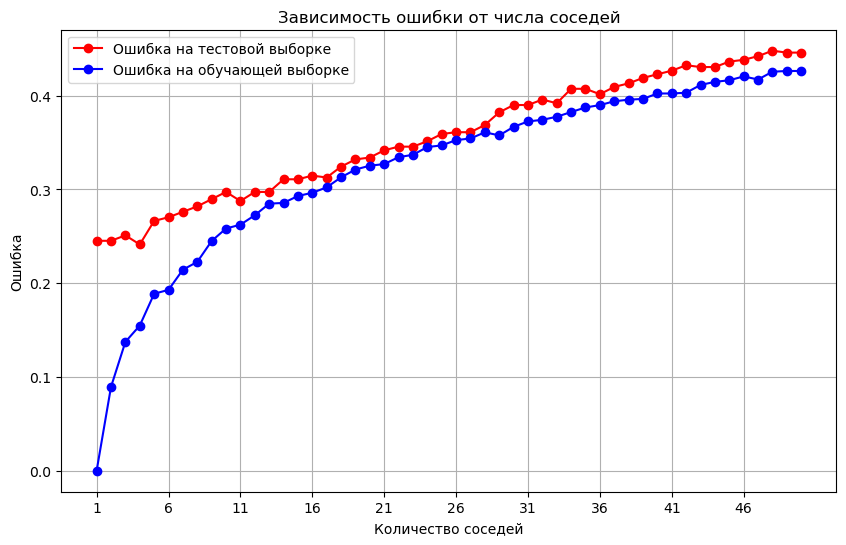

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_errors, marker='o', color='red', label='Ошибка на тестовой выборке')
plt.plot(k_values, train_errors, marker='o', color='blue', label='Ошибка на обучающей выборке')
plt.xlabel('Количество соседей')
plt.ylabel('Ошибка')
plt.xticks(np.arange(1, 50, step=5))
plt.title('Зависимость ошибки от числа соседей')
plt.grid()
plt.legend()
plt.show()

Число соседей, при котором ошибка на тестовой выборке минимальна:

In [169]:
n_neighbors_best = test_errors.index(min(test_errors)) + 1

print(f'Число соседей: {n_neighbors_best}')

Число соседей: 4


### 9. Ошибки на обучающей и тестовой выборках

In [174]:
knn_train_error_best = round(train_errors[n_neighbors_best - 1] * 100, 2)
knn_test_error_best = round(test_errors[n_neighbors_best - 1] * 100, 2)

print(f'Ошибка на обучающей выборке: {knn_train_error_best}%')
print(f'Ошибка на тестовой выборке: {knn_test_error_best}%')

knn_train_accuracy_best = 100 - knn_train_error_best
knn_test_accuracy_best = 100 - knn_test_error_best

print(f'Точность на обучающей выборке: {knn_train_accuracy_best}%')
print(f'Точность на тестовой выборке: {knn_test_accuracy_best}%')

Ошибка на обучающей выборке: 15.48%
Ошибка на тестовой выборке: 24.13%
Точность на обучающей выборке: 84.52%
Точность на тестовой выборке: 75.87%


### 10. Другие классификаторы

Проведём классификацию с помощью метода случайного леса. Получим точности для числа решающих деревьев от 1 до 50:

In [175]:
n_estimators_rf_range = range(1, 51)
rf_accuracies = []

for n in n_estimators_rf_range:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_rf_pred = rf_classifier.predict(X_test)
    rf_accuracies.append(round(accuracy_score(y_test, y_rf_pred), 6))

График зависимости точности на тестовой выборке от числа решающих деревьев:

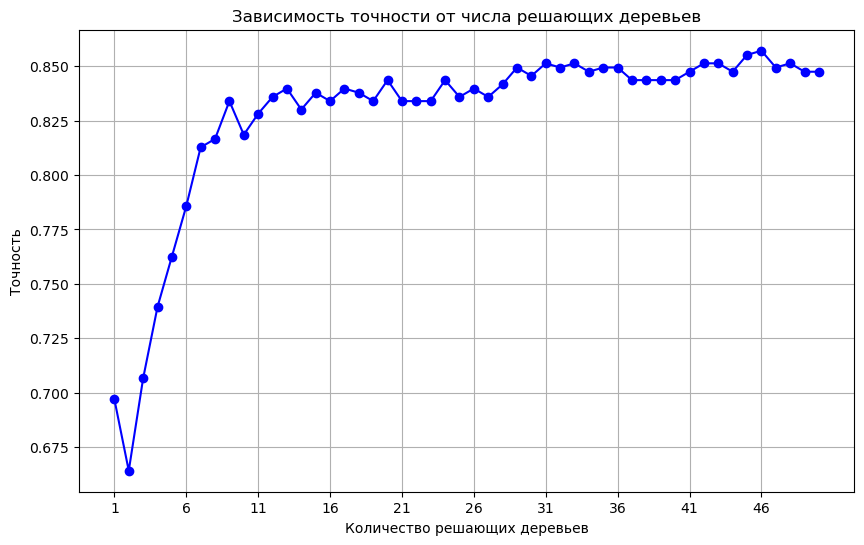

In [176]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_rf_range, rf_accuracies, marker='o', color='blue')
plt.xlabel('Количество решающих деревьев')
plt.ylabel('Точность')
plt.xticks(np.arange(1, 50, step=5))
plt.title('Зависимость точности от числа решающих деревьев')
plt.grid()
plt.show()

Число решающих деревьев, дающее лучший результат, и соответствующая точность:

In [177]:
n_estimators_rf_best = rf_accuracies.index(max(rf_accuracies)) + 1
rf_test_accuracy_best = round(rf_accuracies[n_estimators_rf_best - 1] * 100, 2)

print(f'Число решающих деревьев: {n_estimators_rf_best}')
print(f'Точность на тестовой выборке: {rf_test_accuracy_best}%')

Число решающих деревьев: 46
Точность на тестовой выборке: 85.71%


Таким образом, лучше всего себя показывает классификация методом случайного леса.

In [179]:
print(f'Точность на тестовой выборке (метод ближайших соседей): {knn_test_accuracy_best}%')
print(f'Точность на тестовой выборке (метод случайного леса): {rf_test_accuracy_best}%')

Точность на тестовой выборке (метод ближайших соседей): 75.87%
Точность на тестовой выборке (метод случайного леса): 85.71%


### 11. Несбалансированность классов

Количество объектов в наборе данных:

In [180]:
len(y_train)

1208

Процентное соотношение классов:

In [181]:
print(f'{round((y_train==0).mean() * 100, 2)}%')
print(f'{round((y_train==1).mean() * 100, 2)}%')
print(f'{round((y_train==2).mean() * 100, 2)}%')
print(f'{round((y_train==3).mean() * 100, 2)}%')
print(f'{round((y_train==4).mean() * 100, 2)}%')
print(f'{round((y_train==5).mean() * 100, 2)}%')

7.28%
9.11%
11.51%
16.89%
20.36%
16.47%


Выполнение Undersampling:

In [182]:
rus = RandomUnderSampler(random_state=20)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

Новое количество объектов:

In [183]:
len(y_train_resampled)

616

Соотношение классов:

In [184]:
print(f'{round((y_train_resampled==0).mean() * 100, 2)}%')
print(f'{round((y_train_resampled==1).mean() * 100, 2)}%')
print(f'{round((y_train_resampled==2).mean() * 100, 2)}%')
print(f'{round((y_train_resampled==3).mean() * 100, 2)}%')
print(f'{round((y_train_resampled==4).mean() * 100, 2)}%')
print(f'{round((y_train_resampled==5).mean() * 100, 2)}%')

14.29%
14.29%
14.29%
14.29%
14.29%
14.29%


Количество объектов сократилось в два раза, что может оказать существенное влияние на ошибки в обучающей и тестовой выборках.

### 12. Исключение коррелированных переменных

Сильно коррелирующие переменные - это **Интерпретация индекса массы тела** и **Вес**. Чуть меньшей корреляцией обладает **Интерпретация индекса массы тела** и **Рост**, поскольку ИМТ рассчитывается с использованием веса и роста человека. Переменные Вес и Рост были исключены в п. 2.

### 13. Общие выводы

Рассматриваемых набор данных может применяться для предсказания интерпретации индекса массы тела человека на основе его привычек и образа жизни, вне зависимости от того, имеет ли человек повышенный риск развития ожирения из-за наличия близких родственников с ожирением.

Анализ корреляционной матрицы набора данных, полученных после отсеивания всех людей без случаев ожирения среди близких родственников, а также исключения таких признаков, как рост и вес, показал положительную зависимость риска развития ожирения с потреблением высококалорийной пищи, алкоголем и возрастом (последнее логично, поскольку, к примеру, диабетом II больше подвержены люди в возрасте). Положительную корреляция ожирения с частым употреблением овощей и отрицательную - с частотой физических нагрузок, вероятнее всего, можно объяснить как следствие уже развившегося ожирения и желанием избавиться от лишних килограммов, а не первопричиной.